In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import arcsine
import typing



In [4]:
def wiener(T:float,N:int)->np.ndarray:
    '''
    Funkcja symuluje proces Wienera (ruch Browna) na przedziale czasu [0, T] z N krokami.

    Parametry:
    T (float): Całkowity czas symulacji.
    N (int): Liczba kroków czasowych.

    Zwraca:
    np.ndarray: Tablica wartości procesu Wienera w kolejnych krokach czasowych.
    '''

    dt = T / N
    x=np.zeros(N+1)
    t = np.linspace(0, T, N + 1)
    dt = T / N
    Z = np.random.normal(0, 1, N) * np.sqrt(dt)
    x[1:]=np.cumsum(Z)
    return x

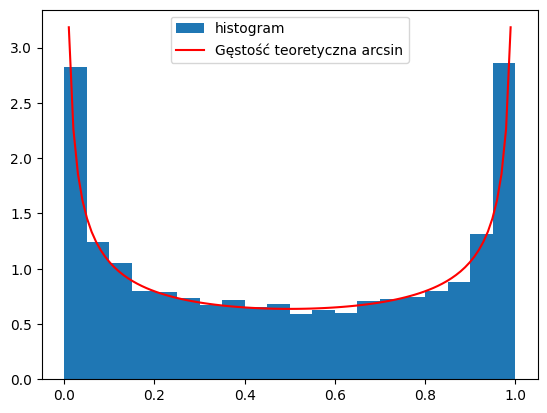

In [5]:

def calculate_time_above_axis(num_simulations: int, n_steps: int, T: float) -> np.ndarray:
    '''
    Oblicza ułamek czasu, jaki proces Wienera spędza powyżej osi OX, dla wielu symulacji.

    Parametry:
    num_simulations (int): Liczba symulacji do wykonania.
    n_steps (int): Liczba kroków czasowych w każdej symulacji.
    T (float): Całkowity czas symulacji.

    Zwraca:
    np.ndarray: Tablica wartości ułamka czasu spędzonego powyżej osi OX w każdej symulacji.
    '''
    
    time_above_axis = np.zeros(num_simulations)
    
    for i in range(num_simulations):
        wiener_process = wiener(T, n_steps)
        time_above_axis[i] = np.sum(wiener_process > 0) / n_steps
    
    return time_above_axis
num_simulations = 10000
n_steps = 1000
T = 1.0
time_above_axis = calculate_time_above_axis(num_simulations, n_steps, T)

plt.hist(time_above_axis,bins=20,density=True,label='histogram')

# # Wizualizacja porównania z teoretycznym rozkładem arcusa sinusa

x = np.linspace(0, 1, 100)
plt.plot(x, arcsine.pdf(x), label='Gęstość teoretyczna arcsin', color='red')
plt.legend()
plt.show()

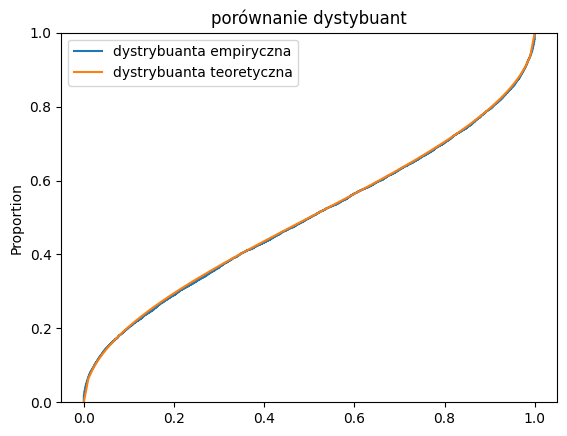

In [6]:
time_above_axis = calculate_time_above_axis(num_simulations, n_steps, T)
x=np.linspace(0,1,100)
sns.ecdfplot(time_above_axis,label='dystrybuanta empiryczna')
plt.plot(x,arcsine.cdf(x),label='dystrybuanta teoretyczna')
plt.title('porównanie dystybuant')
plt.legend()
plt.show()

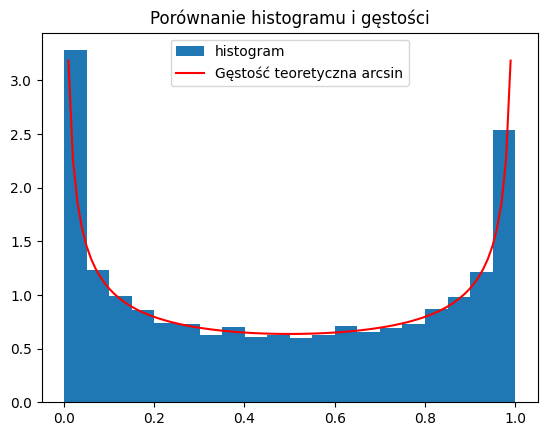

In [7]:
# Parametry symulacji
T = 1.0  # czas trwania procesu
N = 1000  # liczba kroków dyskretyzacji

def calculate_last_zero_crossing_indices(num_simulations: int, n_steps: int, T: float) -> np.ndarray:
    '''
    Oblicza indeksy ostatnich przecięć osi OX dla wielu symulacji procesu Wienera.

    Parametry:
    num_simulations (int): Liczba symulacji do wykonania.
    n_steps (int): Liczba kroków czasowych w każdej symulacji.
    T (float): Całkowity czas symulacji.

    Zwraca:
    np.ndarray: Tablica wartości indeksów ostatnich przecięć osi OX, znormalizowanych przez liczbę kroków.
    '''
    
    last_zero_crossing_index = np.zeros(num_simulations)
    
    for i in range(num_simulations):
        W = wiener(T, n_steps)
        for j in range(1, len(W)):
            if W[j-1] * W[j] <= 0:
                ostatnie = j
        
        last_zero_crossing_index[i] = ostatnie / n_steps
    
    return last_zero_crossing_index
num_simulations = 10000
n_steps = 1000
T = 1.0

last_zero_crossing_index = calculate_last_zero_crossing_indices(num_simulations, n_steps, T)

plt.hist(last_zero_crossing_index,bins=20,density=True,label='histogram')
from scipy.stats import arcsine

x = np.linspace(0, 1, 100)
plt.plot(x, arcsine.pdf(x), label='Gęstość teoretyczna arcsin', color='red')
plt.title('Porównanie histogramu i gęstości')
plt.legend()
plt.show()




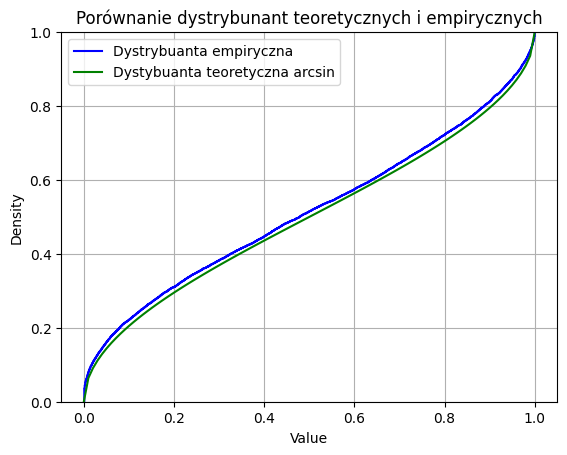

In [8]:


last_zero_crossing_index = calculate_last_zero_crossing_indices(num_simulations, n_steps, T)


sns.ecdfplot(last_zero_crossing_index, label='Dystrybuanta empiryczna', color='blue')

plt.plot(x, arcsine.cdf(x), label='Dystybuanta teoretyczna arcsin', color='green')

plt.legend()
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Porównanie dystrybunant teoretycznych i empirycznych')
plt.grid(True)
plt.show()


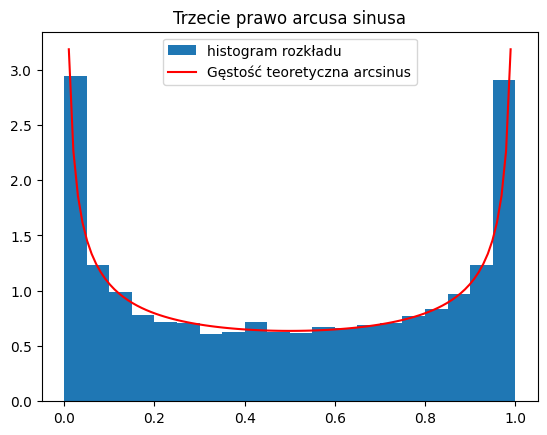

In [9]:
def calculate_max_indices(num_simulations: int, n_steps: int, T: float) -> np.ndarray:
    '''
    Funckja oblicza indeksy maksymalnych wartości procesu Wienera dla wielu symulacji.

    Parametry:
    num_simulations (int): Liczba symulacji do wykonania.
    n_steps (int): Liczba kroków czasowych w każdej symulacji.
    T (float): Całkowity czas symulacji.

    Zwraca:
    np.ndarray: Tablica wartości indeksów maksymalnych wartości procesu Wienera, znormalizowanych przez liczbę kroków.
    '''
    
    max_indices = np.zeros(num_simulations)
    
    for i in range(num_simulations):
        W = wiener(T, n_steps)
        max_indices[i] = np.argmax(W) / n_steps
    
    return max_indices
maxy=calculate_max_indices(num_simulations, n_steps, T)
plt.hist(maxy,bins=20,density=True,label='histogram rozkładu')
x = np.linspace(0, 1, 100)
plt.plot(x, arcsine.pdf(x), label='Gęstość teoretyczna arcsinus', color='red')
plt.title("Trzecie prawo arcusa sinusa")
plt.legend()

plt.show()

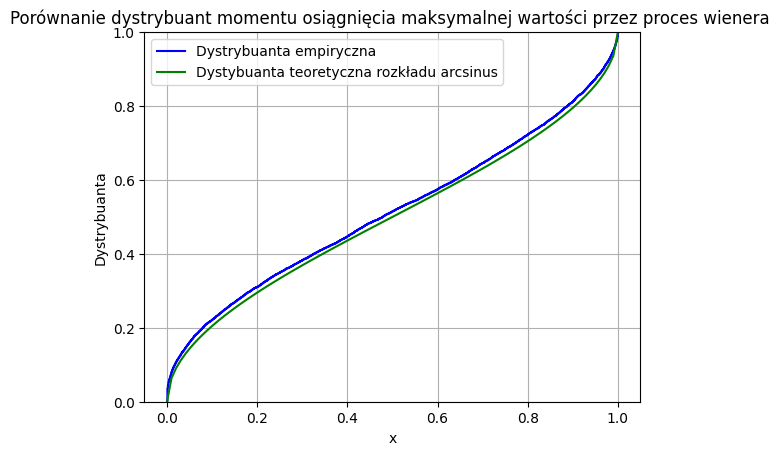

In [10]:
maxy=calculate_max_indices(num_simulations, n_steps, T)
sns.ecdfplot(last_zero_crossing_index, label='Dystrybuanta empiryczna', color='blue')

# Theoretical CDF for arcsine distribution
plt.plot(x, arcsine.cdf(x), label='Dystybuanta teoretyczna rozkładu arcsinus', color='green')

plt.legend()
plt.xlabel('x')
plt.ylabel('Dystrybuanta')
plt.title('Porównanie dystrybuant momentu osiągnięcia maksymalnej wartości przez proces wienera ')
plt.grid(True)
plt.show()